# Protoptye of the Simulation with all steps displayed

Today's Date is:  2023-01-17
[*********************100%***********************]  1 of 1 completed
Mean fluctuation is 0.04787405559713888
Median fluctuation is 0.051341501948894724
Standara Deviation of the fluctuation is 3.325876774356458
Day: 0 Stock Price: 131.48396845542825 Pecentage Change: 7.421541516589557
Day: 1 Stock Price: 131.50423389273968 Pecentage Change: 0.015412857970044463
Day: 2 Stock Price: 135.63279682591826 Pecentage Change: 3.139490502295179
Day: 3 Stock Price: 131.91553251622238 Pecentage Change: -2.7406824873388986
Day: 4 Stock Price: 127.95068386606944 Pecentage Change: -3.0055965165931906
Day: 5 Stock Price: 134.62196025216517 Pecentage Change: 5.213943516768371
Day: 6 Stock Price: 138.15091091894718 Pecentage Change: 2.621378161610331
Day: 7 Stock Price: 141.25956436764764 Pecentage Change: 2.250186718294107
Day: 8 Stock Price: 141.81479356139607 Pecentage Change: 0.39305600030266014
Day: 9 Stock Price: 141.63562280886634 Pecentage Change: -0.1263413696344438

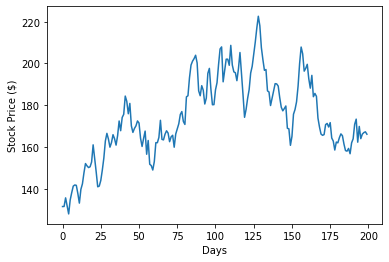

In [16]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import yfinance as yf   
from datetime import date


ticker="TSLA"
today = str(date.today())
print("Today's Date is: ",today)

data = yf.download(ticker,'2019-01-01',today) 

x=np.array(data.Close)
y=np.array(data.Open)
latest_stock_price=x[-1]

delta=data.Close-data.Open

pc=(np.array(delta)/data.Open)*100
pc_mean=np.mean(pc)
pc_stdev=np.std(pc)
pc_median=np.median(pc)
print("Mean fluctuation is",pc_mean)
print("Median fluctuation is",pc_median)
print("Standara Deviation of the fluctuation is",pc_stdev)


stock_price=latest_stock_price   #initial stock price

initial_stocks=0 #initial number of stocks in the portfolio
portfolio=0      #set portfolio to zero initially
cost=0           #set cost to zero
total_days=200   #total days to simulate
price_history=np.zeros(total_days)     #array to store price history for each day
days=np.arange(0,total_days,1)         #array to store the days
precentage_change=np.zeros(total_days) #array to store the percentage change in each day
portfolio=np.zeros(total_days)         # array to store the number of stocks in the portfolio in each day
add_portfolio=0                        #counter to count the number of stocks added in the portfolio

for i in range(total_days):
    dp=np.random.normal(pc_mean,pc_stdev,1)[0]
    '''pick a random number for percentage change with normal distribution 
    for given mean and standard deviation
    '''
    precentage_change[i]=dp     
    #store the percentage change of each day in the array 
    stock_price=stock_price+(stock_price*dp*0.01)  
    #calculate and change the stock price based on percentage change
    price_history[i]=stock_price  
    #store the stock price in price history
    print(f"Day: {i} Stock Price: {stock_price} Pecentage Change: {dp}")
    if dp<-5:    
        #buy 3 stocks everytime when the closing price is less than 5% of the last day
        print("\n########### RED DAY !!! BUY !!!")
        buy=3    
        #no of stocks to buy
        cost+=buy*stock_price  
        #cost paid to buy the stocks at the stock_price
        print(f"Bought {buy} stocks")
        print(f"Total invested capital {cost}\n\n")
        add_portfolio+=3
    portfolio[i]=add_portfolio
    
stocks_owned=np.max(portfolio)
print("\n\nTotal stocks bought",stocks_owned)
print("Total cost",cost)
cost_basis=cost/stocks_owned
print(f"Cost per stock ={cost_basis}")
print("Current stock price:",stock_price)
profit=(stocks_owned*stock_price)-cost
print("Profit Made:",profit)
profit_p=profit/cost*100
print("Profit Percentage:",profit_p)

plt.plot(days,price_history)
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
df = pd.DataFrame({'Day':days,'Closing_Price':price_history,'Percentage_Change':precentage_change,"Portfolio":portfolio})

writer = ExcelWriter('simulated_stock_data_sample.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()